In [1]:
import pandas as pd
heart_disease = pd.read_csv("../datasets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# features matrix
x = heart_disease.drop("target", axis=1)

# labels
y = heart_disease["target"]

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [12]:
# fit model to train data
clf.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
# make prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [15]:
y_test

118    1
175    0
213    0
268    0
107    1
      ..
148    1
101    1
2      1
174    0
41     1
Name: target, Length: 61, dtype: int64

In [16]:
# evaluate
clf.score(x_train,y_train)

1.0

In [17]:
clf.score(x_test,y_test)

0.8688524590163934

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [20]:
confusion_matrix(y_test, y_preds)

array([[25,  3],
       [ 5, 28]], dtype=int64)

In [21]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [26]:
# improve the model
# try diff n_estimators
import numpy as np
np.random.seed(42)

for i in range(10,100,10):
    print(f"**Trying model with {i} estimators**")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) * 100:.2f}%")
    print()

**Trying model with 10 estimators**
Model accuracy on test set: 80.33%

**Trying model with 20 estimators**
Model accuracy on test set: 86.89%

**Trying model with 30 estimators**
Model accuracy on test set: 85.25%

**Trying model with 40 estimators**
Model accuracy on test set: 85.25%

**Trying model with 50 estimators**
Model accuracy on test set: 88.52%

**Trying model with 60 estimators**
Model accuracy on test set: 86.89%

**Trying model with 70 estimators**
Model accuracy on test set: 80.33%

**Trying model with 80 estimators**
Model accuracy on test set: 88.52%

**Trying model with 90 estimators**
Model accuracy on test set: 85.25%



In [27]:
# save the models and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [29]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

# Clean and Transform Data

### 1.1 Make sure it is all numerical

In [31]:
car_sales = pd.read_csv("../datasets/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [32]:
len(car_sales)

1000

In [36]:
# split data
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [42]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [46]:
dummies = pd.get_dummies(car_sales[categorical_features])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [47]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values 
- Fill them with some value
- Remove the samples with missing data altogether

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
car_sales_missing = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


### Using Pandas to tackle missing values

In [58]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [59]:

car_sales_missing["Make"].fillna("missing",inplace=True)

car_sales_missing["Colour"].fillna("missing",inplace=True)

car_sales_missing["Odometer (KM)"].fillna("missing",inplace=True)

car_sales_missing["Doors"].fillna(4,inplace=True)

In [60]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [61]:
# remove rows with missing Price
car_sales_missing.dropna(inplace=True)

In [62]:
len(car_sales_missing)

950

In [63]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [65]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Fill missing values with Scikit-learn

In [70]:
car_sales_missing = pd.read_csv("../datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [71]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [72]:
# remove rows with missing Price
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [73]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [74]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [76]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# FILL CATEGORICAL VALUES WITH "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define features
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer 
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])


# Transform the data
filled_x = imputer.fit_transform(x)
filled_x



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [80]:
car_missing_filled = pd.DataFrame(
    filled_x,
    columns=["Make", "Colour", "Doors", "Odometer (KM)"]
)
car_missing_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [81]:
# process strings to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# define features
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

# transform the data
transformed_x = transformer.fit_transform(car_missing_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [84]:
# train and fit the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# split data:: use seed to get same results
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

# 
model.score(x_test, y_test)

0.21990196728583944

# Choosing the right estimator/algorithm for our Problem
- Classification :- predicting where a sample is A or B
- Regression :- predicting a number

In [90]:
# import Boston housing datasets
boston = pd.read_csv("../datasets/BostonHousing.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [91]:
len(boston)

506

In [94]:
# let's try Ridge model
from sklearn.linear_model import Ridge

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = Ridge()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.6662221670168522

#### Improve the model


In [95]:
# try random forest from ensemble
# let's try Ridge model
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.8654448653350507

# chossing estimators for classsification problems



In [96]:
heart_disease = pd.read_csv("../datasets/heart-disease.csv")

heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
len(heart_disease)

303

In [99]:
# using linear svc from the map
from sklearn.svm import LinearSVC

# set random seed
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = LinearSVC()
clf.fit(x_train, y_train)


# evaluate the linearSVC
clf.score(x_test,y_test)

0.7868852459016393

In [102]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier

# set random seed
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the linearSVC
clf.score(x_test,y_test)

0.8360655737704918

#### Note:
- If data is structured, use ensemble methods
- If datais unstructured, use deep learning or transfer learning

## Fitting Model and Using it to make Predictions


In [105]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier

# set random seed
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the linearSVC
clf.score(x_test,y_test)

0.8360655737704918

In [103]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [104]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Making predictions
- use predict()
- use predict_prob()

In [113]:
# use predict
y_pred = clf.predict(x_test)
y_pred        # prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [110]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [114]:
np.array(y_test)    # truth

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

#### using numpy to compare

In [118]:
# c ompare pred to truth lables
np.mean(y_pred == y_test)           # same as model.score()

0.8360655737704918

#### using sklearn metrics to compare

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8360655737704918

### using predict_proba()
- return probabilities


In [121]:
clf.predict_proba(x_test[:5])

array([[0.02      , 0.98      ],
       [0.94666667, 0.05333333],
       [0.42666667, 0.57333333],
       [0.        , 1.        ],
       [0.02666667, 0.97333333]])

In [122]:
clf.predict(x_test[:5])

array([1, 0, 1, 1, 1], dtype=int64)

## Regrssion Prediction

In [123]:
# try random forest from ensemble
# let's try Ridge model
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.8654448653350507

In [124]:
y_preds = model.predict(x_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [127]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [128]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

### Evaluating a Machine Learning Model
- Estimator `score` method
- The `scoring` parameter
- Problem-specificmetric function

### --> for classification

In [130]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier

# set random seed
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the model
# using extimator score
clf.score(x_test,y_test)

0.8688524590163934

### --> for Regresion

In [131]:
# try random forest from ensemble
# let's try Ridge model
from sklearn.ensemble import RandomForestRegressor

# setup a random seed
np.random.seed(42)

# create data features
x = boston.drop("medv", axis=1)
y = boston["medv"]

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# intantiate the model and fit
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check score of Ridge model
model.score(x_test, y_test)

0.8654448653350507

#### evaluating the scoring parameter

### --> for classification

In [132]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# set random seed
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)


# evaluate the model
# using extimator score
clf.score(x_test,y_test)

0.8688524590163934

In [137]:
cross_val_score(clf, x, y, cv=5)

array([0.83606557, 0.90163934, 0.78688525, 0.81666667, 0.76666667])

In [140]:
np.random.seed(42)
clf_single_score = clf.score(x_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))        # default sccoring parameter = mean_accuracy

# compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8347540983606558)

#### scoring parameters
- Accuracy
- Area under ROC curve
- Confusion matrix
- Classification report

#### --> accuracy


In [143]:
# using linear svc from the map
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# set random seed
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# can max_iter
clf = RandomForestClassifier(n_estimators=150)

cv_score = cross_val_score(clf, x, y, cv=5) 

In [145]:
np.mean(cv_score)

0.8347540983606558

In [146]:
print(f"Heart Disease Classifier Cross-Validation:: Accuracy --> { np.mean(cv_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validation:: Accuracy --> 83.48%


#### ---> Area Under Curve (AUC) / Area Under Receiver Operating Characteristic Curve(ROC)

***True Positive Rates against False Positive rate***

* True Positive = model predicts 1 when trith is 1
* False Pasitive =  model predicts 1 whwn truth is 0
* True Negative = model presics 0 when truth is 0
* False Negative = model predicts 0 when truth is 1


In [149]:
from sklearn.metrics import roc_curve

np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# can max_iter
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.87333333, 0.12666667],
        [0.43333333, 0.56666667],
        [0.41333333, 0.58666667],
        [0.86666667, 0.13333333],
        [0.17333333, 0.82666667],
        [0.14666667, 0.85333333],
        [0.37333333, 0.62666667],
        [0.96      , 0.04      ],
        [0.99333333, 0.00666667],
        [0.46      , 0.54      ]]),
 61)

In [152]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.12666667, 0.56666667, 0.58666667, 0.13333333, 0.82666667,
       0.85333333, 0.62666667, 0.04      , 0.00666667, 0.54      ])

In [153]:
# cal fpr, tpr, treshohlds

fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

In [154]:
# fals postives
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.10344828, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.20689655, 0.20689655, 0.27586207, 0.34482759,
       0.4137931 , 0.48275862, 0.5862069 , 0.65517241, 0.68965517,
       0.79310345, 0.93103448, 1.        ])

In [156]:
tpr

array([0.     , 0.03125, 0.1875 , 0.25   , 0.40625, 0.40625, 0.6875 ,
       0.6875 , 0.71875, 0.75   , 0.75   , 0.78125, 0.78125, 0.8125 ,
       0.875  , 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ])

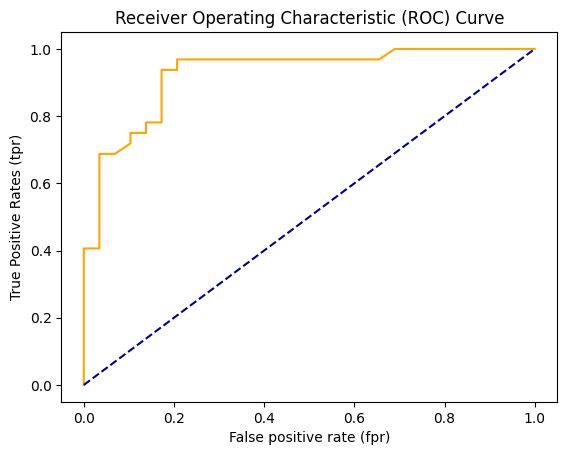

In [158]:
# a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of model
    """

    # plot roc_curve
    plt.plot(fpr,tpr, color="orange", label="ROC")

    # plot a line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True Positive Rates (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.show()

plot_roc_curve(fpr,tpr)

In [161]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9256465517241379

#### perfect auc score

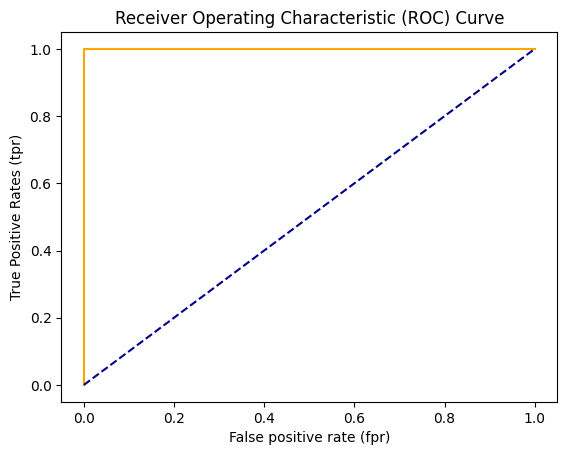

In [162]:
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [163]:
roc_auc_score(y_test, y_test)

1.0

#### ---> Confusion Matrix

In [164]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [166]:
# vosualizing conf_matrix with pd.crosstab()

pd.crosstab(
    y_test, y_preds,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


<Axes: >

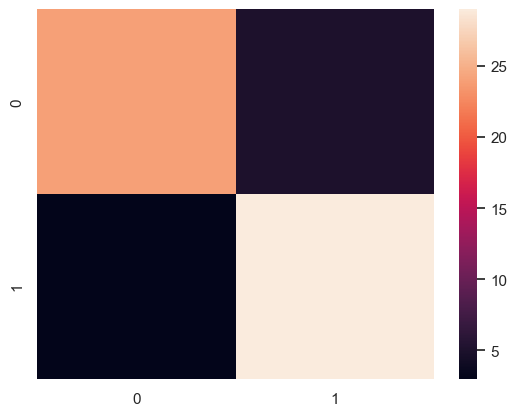

In [168]:
# using seaborn to visualize conf_matrix
import seaborn as sns
sns.set(font_scale=1)

# craete conf_matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot the matrix
sns.heatmap(conf_mat)

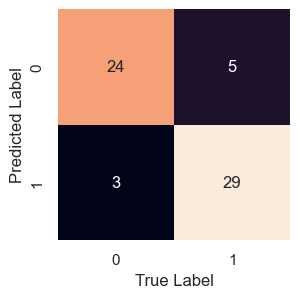

In [173]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat)

In [174]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\codedsmile\Desktop\MLOPS\venv\Lib\site-packages\sklearn\metrics\__init__.py)

#### ---> Classification Report